In [56]:
import pandas as pd
import matplotlib.pyplot as plt

import LinRegAC.utilsAC as utilsAC
import LinRegAC.linRegAC as linRegAC
import LinRegAC.crossValdAC as crossValdAC

In [57]:
CH_dataCols = ['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
CHdata = pd.read_csv('computer_hardware/machine.data', names=CH_dataCols)
CHdata

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [58]:
CHdata_x = CHdata[CHdata.columns[2:-2]]
CHdata_y = CHdata[CHdata.columns[-2]]

In [59]:
train_x, train_y, test_x, test_y = utilsAC.splitTrainTest(CHdata_x, CHdata_y, 0.8)

In [60]:
train_x, train_min, train_max = utilsAC.normMinMax(train_x, mode='train')
test_x = utilsAC.normMinMax(test_x, mode='test', train_min=train_min, train_max=train_max)

In [61]:
linReg1 = linRegAC.LinReg(mode=1)
linReg1.fit(train_x, train_y)
pred1 = linReg1.predict(test_x)
print(f'MSE: {utilsAC.getMse(test_y, pred1)}, RMSE: {utilsAC.getRmse(test_y, pred1)}')

Fitting completed.
Mode = 1, using Normal equation w = (X^T X)^-1 X^T y

MSE: 17395.84067635766, RMSE: 131.89329276486222


In [62]:
lrs = [0.01, 0.005, 0.003, 0.001]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'violet', 'purple']

In [63]:
hld_cv = crossValdAC.CrossVald(option='holdout')
gd_hld_train_costs, gd_hld_opt_model = hld_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing Holdout Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 65.4364
Iteration  200 | Loss = 64.9124
Iteration  300 | Loss = 64.7372
Iteration  400 | Loss = 64.6664
Iteration  500 | Loss = 64.6373
Iteration  600 | Loss = 64.6254
Iteration  700 | Loss = 64.6205
Iteration  800 | Loss = 64.6185
Iteration  900 | Loss = 64.6176
Iteration 1000 | Loss = 64.6173
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2520.3715622956843, RMSE: 50.203302304685934
----------------- lr : 0.005 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 57.4932
Iteration  200 | Loss = 55.2780
Iteration  300 | Loss = 54.5494
Iteration  400 | Loss = 54.1604
Iteration  500 | Loss = 53.9375
Iteration  600 | Loss = 53.8089
Iteration  700 | Loss = 53.7345
Iteration  800 | Loss = 53.6916
Iteration  900 | Loss = 53.6667
Iteration 1000 | Loss = 53.6523
Fittin

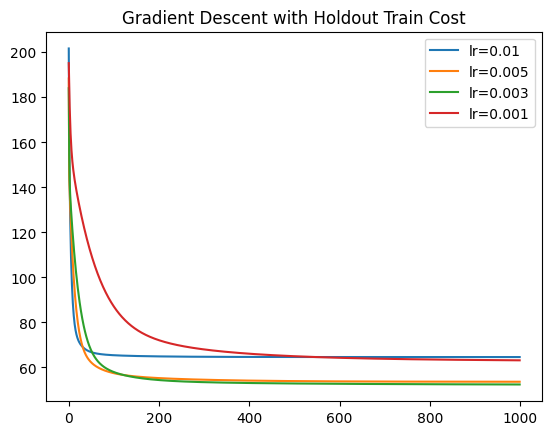

In [64]:
fig = plt.figure()
for i in range(len(gd_hld_train_costs)):
    plt.plot(gd_hld_train_costs[i], label=f'lr={lrs[i]}')
plt.legend()
plt.title('Gradient Descent with Holdout Train Cost')
plt.show()
fig.savefig('plots/gd_hld.png')

In [65]:
print(gd_hld_opt_model)

{'rmse': 50.203302304685934, 'lr': 0.01, 'w': array([-60.35021828,  77.30752605, 450.13887518, 369.69323116,
       145.06676708,  53.35839185, 289.84063608])}


In [66]:
sgd_hld_train_costs, sgd_hld_opt_model = hld_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing Holdout Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 54.9118
Iteration  200 | Loss = 53.4537
Iteration  300 | Loss = 52.9998
Iteration  400 | Loss = 52.8457
Iteration  500 | Loss = 52.7950
Iteration  600 | Loss = 52.7797
Iteration  700 | Loss = 52.7758
Iteration  800 | Loss = 52.7755
Iteration  900 | Loss = 52.7760
Iteration 1000 | Loss = 52.7765
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 5893.654521176807, RMSE: 76.77014081774767
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 57.8994
Iteration  200 | Loss = 55.1497
Iteration  300 | Loss = 54.4408
Iteration  400 | Loss = 54.1288
Iteration  500 | Loss = 53.9602
Iteration  600 | Loss = 53.8644
Iteration  700 | Loss = 53.8093
Iteration  800 | Loss = 53.7776
Iteration  900 | Loss = 53.7595
Iteration 1000 | Loss = 53.749

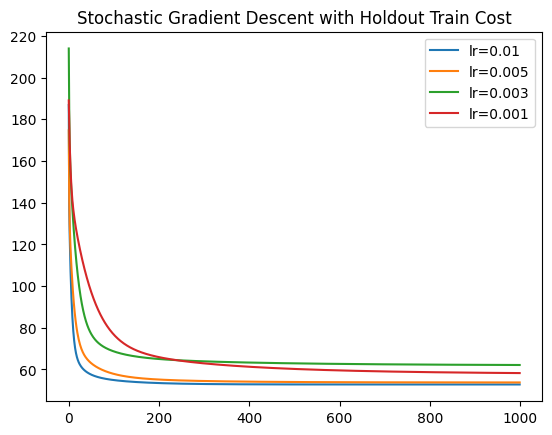

In [67]:
fig = plt.figure()
for i in range(len(sgd_hld_train_costs)):
    plt.plot(sgd_hld_train_costs[i], label=f'lr={lrs[i]}')
plt.legend()
plt.title('Stochastic Gradient Descent with Holdout Train Cost')
plt.show()
fig.savefig('plots/sgd_hld.png')

In [68]:
print(sgd_hld_opt_model)

{'rmse': 54.17602685810503, 'lr': 0.003, 'w': array([-61.85727044,  92.8858601 , 487.11070998, 360.51806752,
       138.34809919,   5.3501574 , 326.37708011])}


In [69]:
montc_cv = crossValdAC.CrossVald(option='monte_carlo', monte_carlo=5)
gd_montc_train_costs, gd_montc_opt_model = montc_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing Monte Carlo Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 63.5933
Iteration  200 | Loss = 63.0992
Iteration  300 | Loss = 62.9757
Iteration  400 | Loss = 62.9367
Iteration  500 | Loss = 62.9240
Iteration  600 | Loss = 62.9198
Iteration  700 | Loss = 62.9184
Iteration  800 | Loss = 62.9180
Iteration  900 | Loss = 62.9178
Iteration 1000 | Loss = 62.9178
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2743.1893537889155, RMSE: 52.375465189236415
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 43.8950
Iteration  200 | Loss = 42.1088
Iteration  300 | Loss = 41.6634
Iteration  400 | Loss = 41.5403
Iteration  500 | Loss = 41.5060
Iteration  600 | Loss = 41.4963
Iteration  700 | Loss = 41.4936
Iteration  800 | Loss = 41.4928
Iteration  900 | Loss = 41.4926
Iteration 1000 | Loss = 41.4925
Fit

In [70]:
print(gd_montc_opt_model)

{'rmse': 74.2062794353751, 'lr': 0.003, 'w': array([-48.50916804,  68.12263542, 489.04240656, 343.2982403 ,
       192.09118   ,  38.90370043, 147.62711918])}


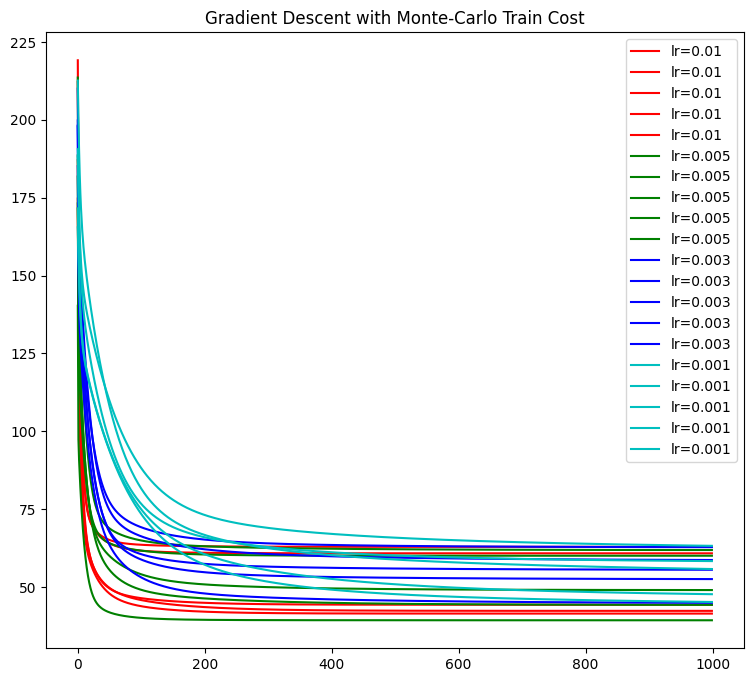

In [71]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(gd_montc_train_costs)):
    for j in range(len(gd_montc_train_costs[i])):
        plt.plot(gd_montc_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Gradient Descent with Monte-Carlo Train Cost')
plt.show()
fig.savefig('plots/gd_montc.png')

In [72]:
sgd_montc_train_costs, sgd_montc_opt_model = montc_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing Monte Carlo Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 57.7190
Iteration  200 | Loss = 57.2158
Iteration  300 | Loss = 57.1781
Iteration  400 | Loss = 57.1767
Iteration  500 | Loss = 57.1776
Iteration  600 | Loss = 57.1781
Iteration  700 | Loss = 57.1782
Iteration  800 | Loss = 57.1783
Iteration  900 | Loss = 57.1783
Iteration 1000 | Loss = 57.1784
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 5217.430184516416, RMSE: 72.23178098674029
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 51.8860
Iteration  200 | Loss = 51.0314
Iteration  300 | Loss = 50.7570
Iteration  400 | Loss = 50.6578
Iteration  500 | Loss = 50.6212
Iteration  600 | Loss = 50.6074
Iteration  700 | Loss = 50.6021
Iteration  800 | Loss = 50.5999
Iteration  900 | Loss = 50.5990
Iteration 1000 | Loss = 50.

In [73]:
print(sgd_montc_opt_model)

{'rmse': 61.39550976107341, 'lr': 0.001, 'w': array([-36.82128407,  42.14690813, 215.67083071, 306.65403726,
       161.29724828,  54.21942149, 140.60614339])}


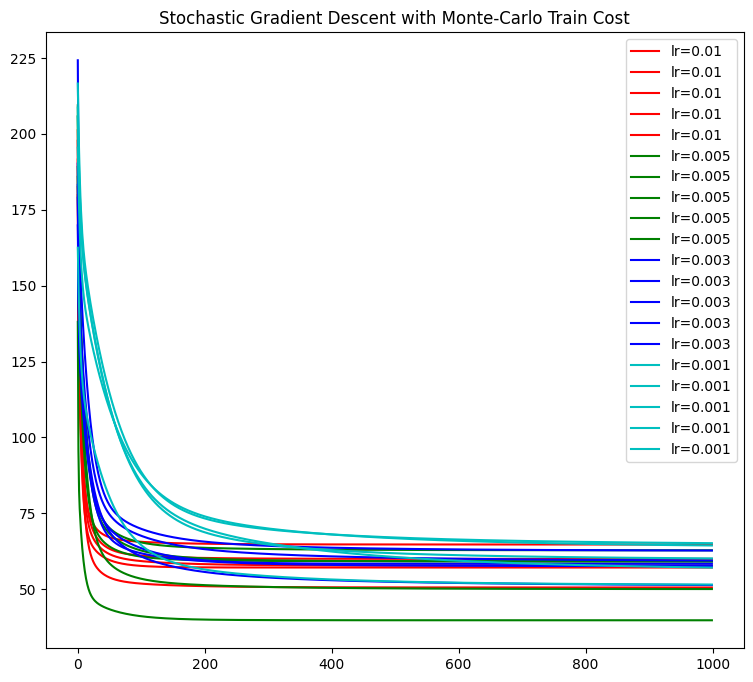

In [74]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(sgd_montc_train_costs)):
    for j in range(len(sgd_montc_train_costs[i])):
        plt.plot(sgd_montc_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Stochastic Gradient Descent with Monte-Carlo Train Cost')
plt.show()
fig.savefig('plots/sgd_montc.png')

In [75]:
kfold_cv = crossValdAC.CrossVald(option='k_fold', k_fold=6)
gd_kfold_train_costs, gd_kfold_opt_model = kfold_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing K-Fold Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 61.6006
Iteration  200 | Loss = 60.8598
Iteration  300 | Loss = 60.6412
Iteration  400 | Loss = 60.5674
Iteration  500 | Loss = 60.5418
Iteration  600 | Loss = 60.5329
Iteration  700 | Loss = 60.5297
Iteration  800 | Loss = 60.5286
Iteration  900 | Loss = 60.5282
Iteration 1000 | Loss = 60.5281
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2895.6046306305493, RMSE: [53.810822616185206]
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 59.9486
Iteration  200 | Loss = 59.4366
Iteration  300 | Loss = 59.3384
Iteration  400 | Loss = 59.3130
Iteration  500 | Loss = 59.3060
Iteration  600 | Loss = 59.3040
Iteration  700 | Loss = 59.3034
Iteration  800 | Loss = 59.3032
Iteration  900 | Loss = 59.3032
Iteration 1000 | Loss = 59.3032
Fittin

In [76]:
print(gd_kfold_opt_model)

{'rmse': 63.692273963198026, 'lr': 0.001, 'w': array([-46.25316687,  65.91836686, 411.76694557, 368.89560957,
       159.86769273,  98.50505331, 121.71378289])}


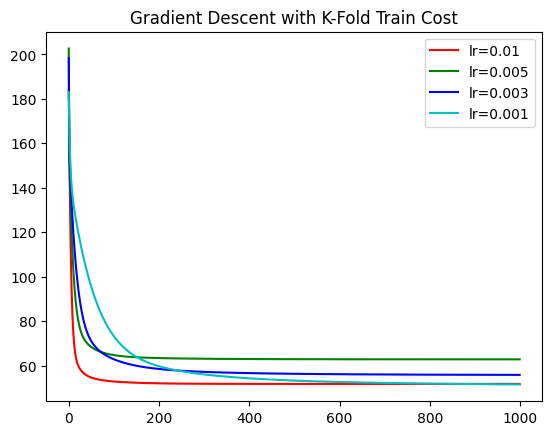

In [77]:
fig = plt.figure()
for i in range(len(gd_kfold_train_costs)):
    plt.plot(gd_kfold_train_costs[i], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Gradient Descent with K-Fold Train Cost')
plt.show()
fig.savefig('plots/gd_kfold.png')

In [78]:
sgd_kfold_train_costs, sgd_kfold_opt_model = kfold_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing K-Fold Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 53.5529
Iteration  200 | Loss = 52.9081
Iteration  300 | Loss = 52.7404
Iteration  400 | Loss = 52.6903
Iteration  500 | Loss = 52.6746
Iteration  600 | Loss = 52.6695
Iteration  700 | Loss = 52.6676
Iteration  800 | Loss = 52.6669
Iteration  900 | Loss = 52.6666
Iteration 1000 | Loss = 52.6665
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 8311.378714914854, RMSE: [91.16676321398525]
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 58.2086
Iteration  200 | Loss = 57.9920
Iteration  300 | Loss = 57.9819
Iteration  400 | Loss = 57.9821
Iteration  500 | Loss = 57.9824
Iteration  600 | Loss = 57.9825
Iteration  700 | Loss = 57.9825
Iteration  800 | Loss = 57.9825
Iteration  900 | Loss = 57.9825
Iteration 1000 | Loss = 57.982

In [79]:
print(sgd_kfold_opt_model)

{'rmse': 64.24057760515429, 'lr': 0.003, 'w': array([-57.41977689,  74.30021137, 445.4065317 , 408.09127132,
       216.42319729,  -2.34604615, 221.45877372])}


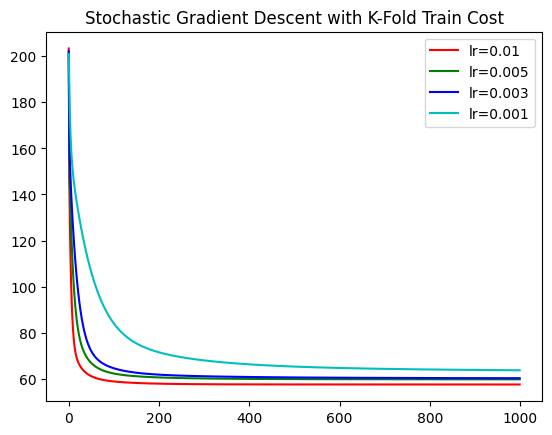

In [80]:
fig = plt.figure()
for i in range(len(sgd_kfold_train_costs)):
    plt.plot(sgd_kfold_train_costs[i], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Stochastic Gradient Descent with K-Fold Train Cost')
plt.show()
fig.savefig('plots/sgd_kfold.png')